In [14]:
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import Subset

from flight.federation.topologies.node import NodeKind
from flight.federation.topologies import Topology
from flight.federation.topologies.utils import flat_topology, hierarchical_topology, balanced_topology, balanced_topology_by_leaves

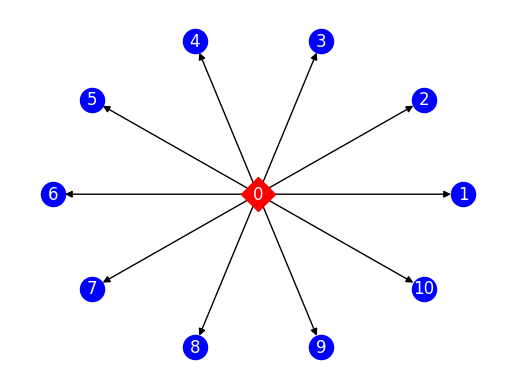

In [2]:
topo = flat_topology(10)
topo.draw(prog="circo")
plt.show()

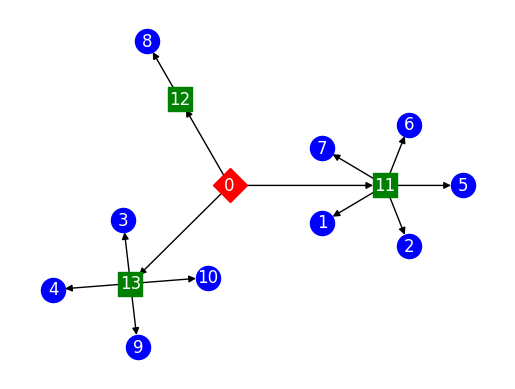

In [3]:
topo = hierarchical_topology(10, (3,), rng=1)
topo.draw(prog="circo")
plt.show()

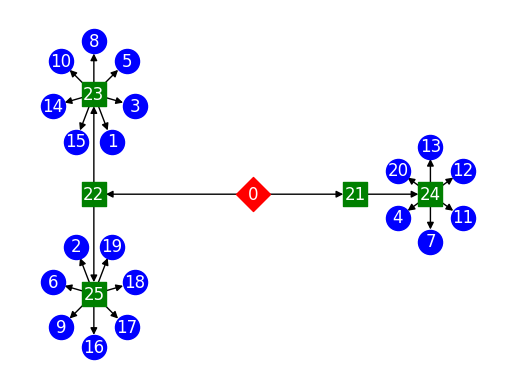

In [4]:
topo = hierarchical_topology(20, (2, 3,), rng=1)
topo.draw(prog="circo")
plt.show()

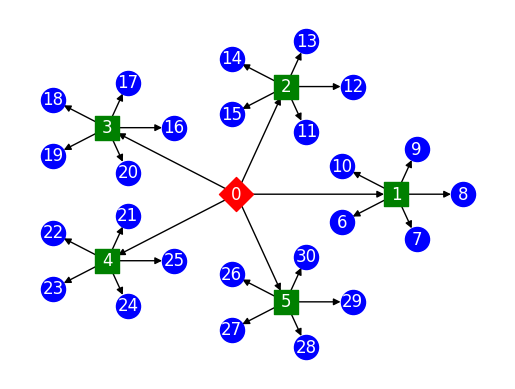

In [5]:
topo = balanced_topology(5, 2)
topo.draw(prog="circo")
plt.show()

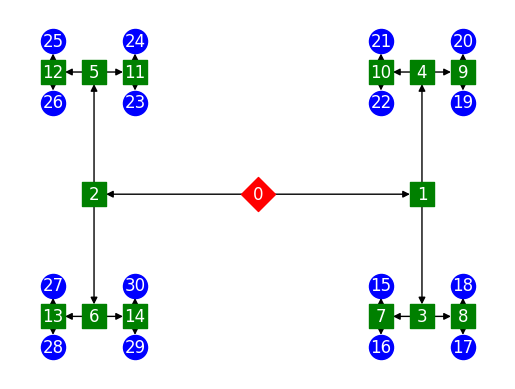

In [6]:
topo = balanced_topology_by_leaves(16, 4)
topo.draw(prog="circo")
plt.show()

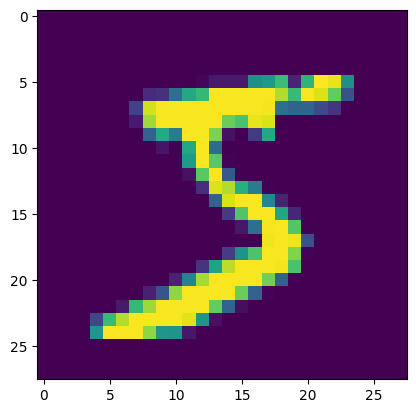

In [7]:
from torchvision.datasets import MNIST
from torchvision import transforms

mnist = MNIST(root="~/Research/Data/Torch-Data/", transform=transforms.ToTensor())
plt.imshow(mnist[0][0].squeeze())
plt.show()

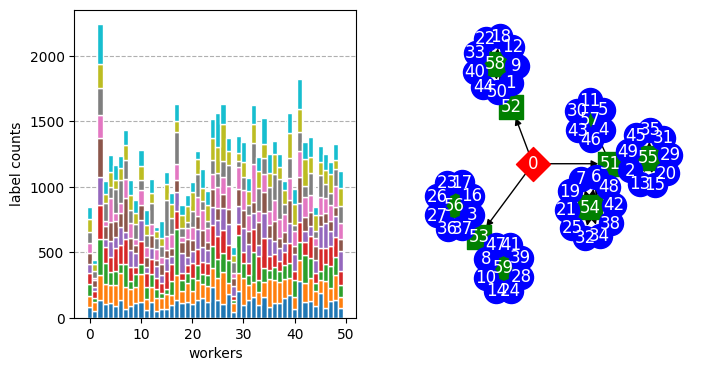

In [9]:
from flight.learning.utils import fed_barplot, federated_split

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

topo = hierarchical_topology(50, (3, 6,), rng=1)
fed_data = federated_split(
    topo, 
    mnist,
    10,
    label_alpha=10.0,
    sample_alpha=10.0,
    rng=1,             
)
fed_barplot(fed_data, 10, width=1.0, edgecolor="white", ax=axes[0])
topo.draw(ax=axes[1], prog="circo")
axes[0].grid(True, axis="y", linestyle="--")
axes[0].set_axisbelow(True)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.73it/s]

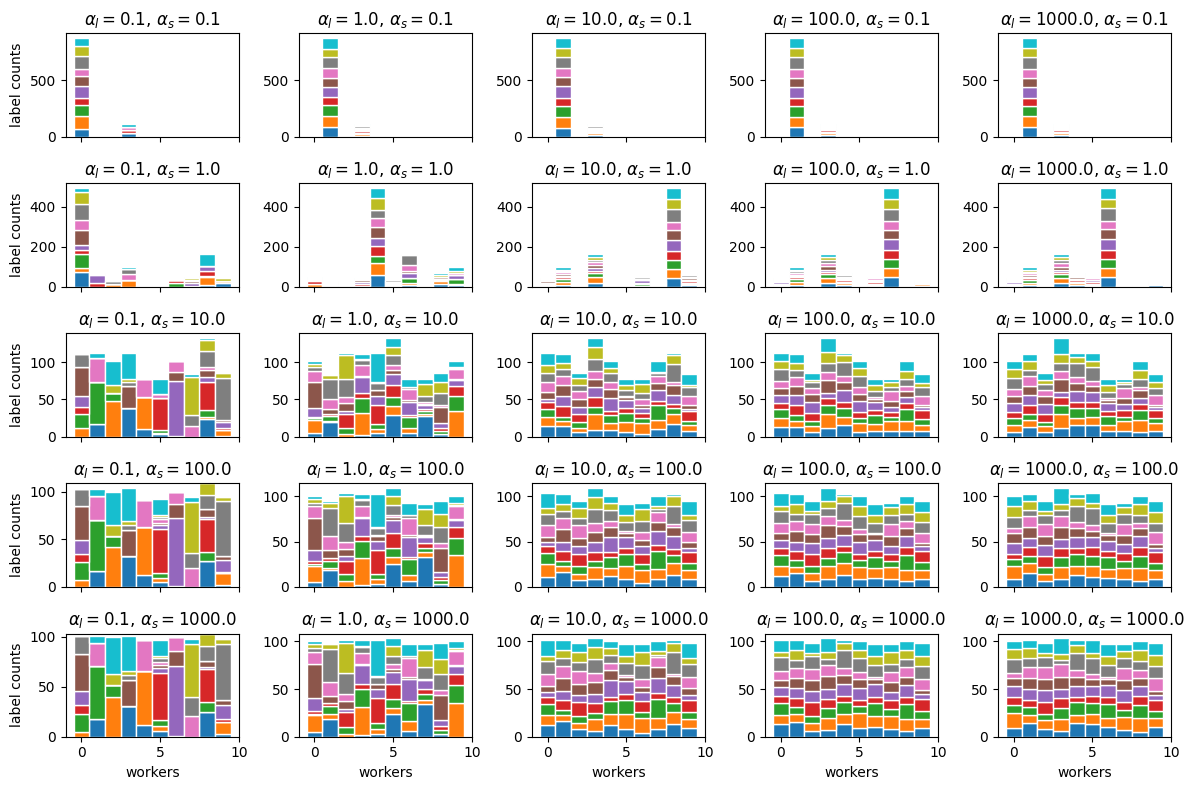

In [24]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
figs, axes = plt.subplots(
    nrows=len(alphas),
    ncols=len(alphas),
    figsize=(12, 8),
    sharex=True,
    sharey=False,
)

topo = hierarchical_topology(10, (2, 3,), rng=1)
pbar = tqdm(total=len(alphas) ** 2)

for i, sa in enumerate(alphas):
    for j, la in enumerate(alphas):
        ax = axes[i, j]
        fed_data = federated_split(
            topo,
            Subset(mnist, list(range(1000))),
            10,
            label_alpha=la,
            sample_alpha=sa,
            rng=1,   
        )
        fed_barplot(fed_data, 10, width=1.0, edgecolor="white", ax=ax)
        ax.set_title(f"$\\alpha_l = {la:0.1f}$, $\\alpha_s = {sa:0.1f}$")
        pbar.update()

        if i != len(alphas) - 1:
            ax.set_xlabel("")

        if j != 0:
            ax.set_ylabel("")

plt.tight_layout()
plt.show()